<b>Definations</b>

1. Corpus is a collection of text document eg a database containing news or database containing tweets

corpur > Documents > paragraphs > senteses > tokens
Tokens are smaller units text(tokens are considered to be phrase, word or ngrams)

ngrams is a combination of N words/ characters together
eg I love my phone

unigrams(n=1) :I, Love, my, phone.
Bigrams (n=2) : I love, love my, my phone
Trigrams (n=3): I love my, love my phone 


Tokenization is a process of spliting a text object into smaller units(tokens)

Sentense "I went to New York to play football"

<h1>White space tokenization</h1>
tokens: "I", "went", "to", "New-York", "to", "play", "football"

<h2>Regular expression tokenizer</h2>
eg
Sentence: "Football, Cricket,Golf,Tennis"

lets use a split function
re.spit(r'[:,s], line)
Token: "Football", Cricket, "Golf",
"Tennis"


<h2>Normalization</h2>
Morpheme : is a base form of a word
A token is made up of [ pefix morpheme suffix ]
eg Antinationalist: Anti+national+ist

Normalization iis the process of converting a token into its base form(morpheme)
Normalization help reduce data dimensionalitity and text cleaning 

Methods used in normalization are:
    a) Stemming
    b)Lemmatization
      <h3>Normalization:Stemming</h3>
Its an elemntary rule based process of removing of inflenctional forms from a token. It outputs the stem of a word.
eg "Laughing", "laughed", "lough", "loughs" >>>>>>> "lough"

This is not good when doing ananlyis 
eg His team are not winning
>>hi team are not winn {look at winn} there is nothing like that in the dictionary

    <h3>Normalization:Stemming</h3>

  Its a step by step process for rereducing a token to its lemma. It makes use of vocabulary, word structure, part of speech tags and grammer relations

example 
am, are, is >>>>>>>> be
running, ran,run, rans >>>>run






                                    Exploring Text Data

Working with text is generally more challenging than working with numerical data. Hence, any kind of technique that helps in generating an intuition of the existing dataset is welcome. **One of the simplest approach to understand any text document or to compare multiple documents can be to compute a frequency table of individual words present in the document/documents and use it to conduct further experiements like: finding top words per document, finding top common words among documents etc.**

In our case, we have taken the challenge of **Analyzing Sentiments from Twitter data, so we will focus on how to generate word frequencies and use it to create Word Clouds in Python that will help us get a better overall understanding of the dataset**.






In [0]:
#Loading the dataset
import pandas as pd 
tweets = pd.read_csv('/content/sample_data/tweets.csv', encoding = 'ISO-8859-1')

tweets.head()

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False


# ** Generating Word Frequency**
Let's try generating a frequency table of all the words present in all the tweets combined.

Lets do a little bit of cleaning first 

In [0]:
tweets['text'] = tweets['text'].str.replace("[^a-zA-Z]", " ")

In [0]:
tweets.head()

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT rssurjewala Critical question Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,RT Hemant Did you vote on Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,3,RT roshankar Former FinSec RBI Dy Governor ...,False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False
3,4,4,RT ANI news Gurugram Haryana Post office ...,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False
4,5,5,RT satishacharya Reddy Wedding mail today ...,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False


In [0]:
def gen_freq(text):
    #Will store the list of words
    word_list = []

    #Loop over all the tweets and extract words into word_list
    for tw_words in text.split():
        word_list.extend(tw_words)

    #Create word frequencies using word_list
    word_freq = pd.Series(word_list).value_counts()

    #Print top 20 words
    word_freq[:20]
    
    return word_freq

gen_freq(tweets.text.str)

U                 14523
RT                11057
demonetization     8001
to                 7662
t                  6913
                  ...  
Emphasizes            1
HNIb                  1
CusNP                 1
lauds                 1
iamwithPmModi         1
Length: 16460, dtype: int64

# ** EDA using Word Clouds**
Now that you have succesfully created a frequency table, you can use that to create multiple visualizations in the form of word clouds. Sometimes, the quickest way to understand the context of the text data is using a word cloud of top 100-200 words. Let's see how to create that in Python.


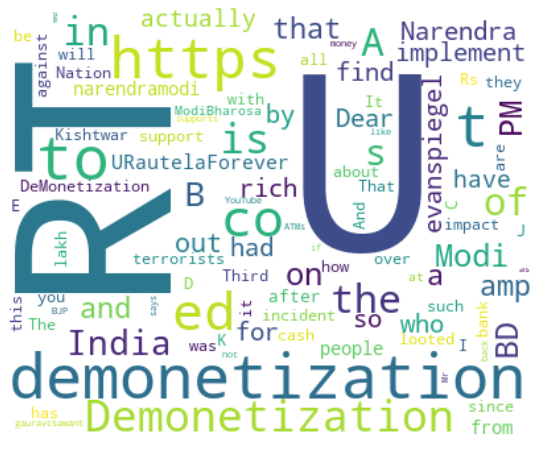

In [0]:
#Import libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#Generate word frequencies
word_freq = gen_freq(tweets.text.str)

#Generate word cloud
wc = WordCloud(width=400, height=330, max_words=100, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Note:-

There is noise in the form of "RT" which can be removed from the word frequency.
Stop words like "the", "in", "to", "of" etc. are obviously ranking among the top frequency words but these are just constructs of the English language and are not specific to the people's tweets.
Words like "demonetization" have occured multiple times. The reason for this is that the current text is not Normalized so words like "demonetization", "Demonetization" etc. are all considered as different words.
The above are some of the problems that we need to address in order to make better visualization. Let's solve some of the problems!

In [0]:
#Text cleaning
import re

def clean_text(text):
    #Remove RT
    text = re.sub(r'RT', '', text)

    #Fix &
    text = re.sub(r'&amp;', '&', text)
    
    #Remove punctuations
    text = re.sub(r'[?!.;:,#@-]', '', text)

    #Convert to lowercase to maintain consistency
    text = text.lower()
    return text

This solves problems related to RT and also the problem of counting same word twice due to case difference. Now let's remove the common stop words.

In [0]:
#Stop words Removal

#Import list of stopwards
from wordcloud import STOPWORDS

print(STOPWORDS)

{"they'd", 'do', 'each', "they're", 'her', 'myself', 'those', 'had', 'hers', 'are', 'does', "what's", "wouldn't", "we're", 'over', 'between', 'until', 'theirs', 'is', 'them', 'both', "where's", "when's", 'an', "there's", 'why', 'otherwise', 'shall', 'what', 'all', 'most', 'been', 'again', 'as', 'with', 'this', 'when', 'since', 'however', "she'll", "haven't", "why's", 'no', 'their', 'its', 'or', "she's", "that's", 'if', 'out', 'same', "he'll", 'here', 'and', "can't", "we've", 'for', 'then', 'where', "it's", 'few', 'http', 'also', 'am', 'ever', 'get', "here's", 'whom', "wasn't", 'they', "shouldn't", 'herself', 'itself', 'ourselves', "shan't", 'has', 'r', 'can', "you'd", 'after', 'have', 'very', 'who', 'than', 'below', "weren't", 'these', 'yourself', 'me', 'by', 'having', "hasn't", "we'd", 'some', 'be', 'against', 'there', 'such', 'other', 'just', "they've", "aren't", "i'll", 'did', "doesn't", 'k', 'else', 'yours', 'ours', "how's", "let's", 'more', "don't", 'on', 'so', "didn't", "he's", "

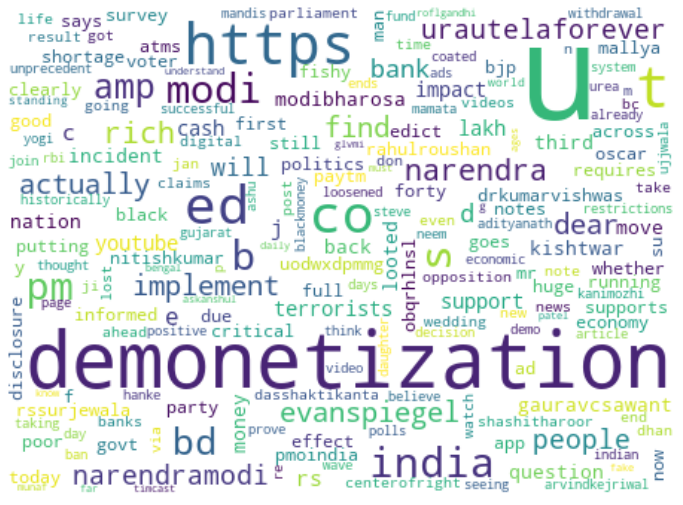

In [0]:
text = tweets.text.apply(lambda x: clean_text(x))
word_freq = gen_freq(text.str)*100
word_freq = word_freq.drop(labels=STOPWORDS, errors='ignore')

#Generate word cloud
wc = WordCloud(width=450, height=330, max_words=200, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 14))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


Now that you have succesfully created a wordcloud, you can get some insight into the areas of interest of the general twitter users:

1. It is evident that people are talking about govt. policies like demonetization, J&K.
2. There are some personalitites that are mentioned numerous times like evanspiegel, PM Narendra Modi, Dr Kumar Vishwas etc.
3. There are also talks about oscars, youtube and terrorists
4. There are many sub-topics that revolve around demonetization like atms, bank, cash, paytm etc. Which tells that many people are concerned about it.

As you may have already seen that without performing preprocessing operations like cleaning, removing stopwords and changing case in the dataset the representation always comes out wrong. In this case, it was that the wordcloud was full of noise but in other cases it might be your Machine Learning model that is going to suffer.

Also something to note is even now some words are misreperesented for example: modi, narendra and narendramodi all refer to the same person. This can eaisly be solved by Normalizing our text which is a technique that you'll learn in future models

In [0]:
#We are not finished as you would have noticed, even the current word cloud has some form of noise especially from strange symbols like <U...>

In [0]:
from nltk.tokenize import sent_tokenize



In [0]:
import nltk

In [0]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
text = "Hi Brian, How are you doing? I will be traveling to your city. Lets catchup"

sent_tokenize(text)
#this outputs a list of sentenses 

['Hi Brian, How are you doing?',
 'I will be traveling to your city.',
 'Lets catchup']

In [0]:
word_tokenize(text)
#this gives us a list of words that are present 

['Hi',
 'Brian',
 ',',
 'How',
 'are',
 'you',
 'doing',
 '?',
 'I',
 'will',
 'be',
 'traveling',
 'to',
 'your',
 'city',
 '.',
 'Lets',
 'catchup']

# **Stemming**

In [0]:
from nltk.stem.porter import *

In [0]:
stemmer = PorterStemmer()

In [0]:
print(stemmer.stem("playing"))
print(stemmer.stem("played"))
print(stemmer.stem("plays"))

#How ever this is not a good normalization 
# method because it can produce words not present int the dictionary.
#eg
print(stemmer.stem("increases"))

play
play
play
increas


In [0]:
# lets do Lemmatization
from nltk.stem import WordNetLemmatizer, wordnet

In [0]:
import nltk 
nltk.download('wordnet') //You have to download wordnet first

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
lenn = WordNetLemmatizer() 

In [0]:
print(lenn.lemmatize("increases"))
print(lenn.lemmatize("running"))
#lets impliment a partten of speach tag ie v for verbs
int(lenn.lemmatize("running", pos="v"))